In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:
file_path ="/content/sample_data/AB_NYC_2019.csv"
df = pd.read_csv(file_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
sns.set(rc={'figure.figsize':(6,4)})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.drop(['id','host_id','host_name'], axis=1,inplace=True)

In [9]:
sns.set_theme(style="darkgrid")

In [10]:
df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
df.fillna({"reviews_per_month":0, "name":0, "last_review":0}, inplace=True)
df.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
print(df['neighbourhood_group'].nunique())
print(df['neighbourhood_group'].unique())
print(df['room_type'].nunique())
print(df['room_type'].unique())

5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
3
['Private room' 'Entire home/apt' 'Shared room']


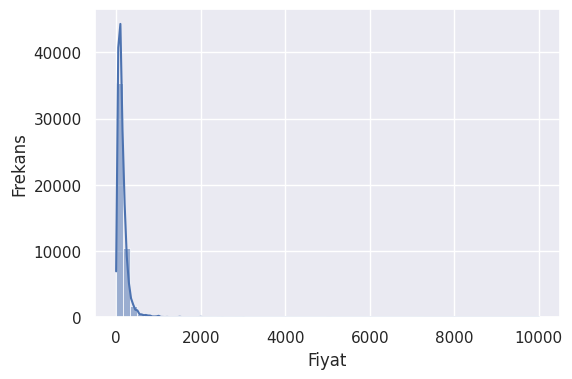

In [19]:
sns.histplot(df["price"],kde=True, bins=60, )
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

Text(0.5, 1.0, 'Oda tiplerinin frekansı')

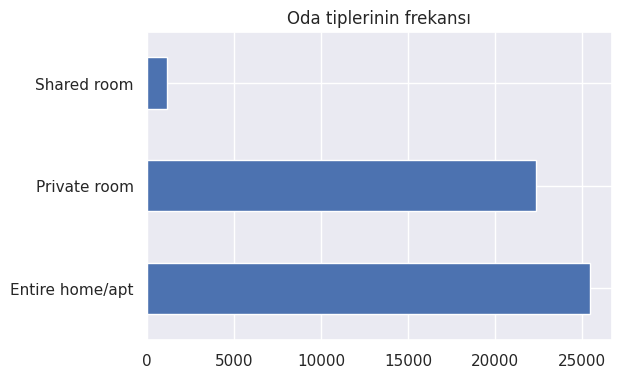

In [20]:
df['room_type'].value_counts().plot.barh().set_title("Oda tiplerinin frekansı")

Text(0.5, 1.0, 'Mahalle gruplarının frekansı')

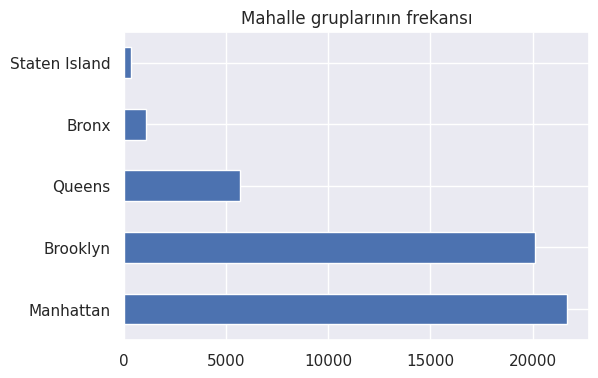

In [21]:
df['neighbourhood_group'].value_counts().plot.barh().set_title("Mahalle gruplarının frekansı")

<ipython-input-25-ac27bf6540af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(12,12))


<Axes: >

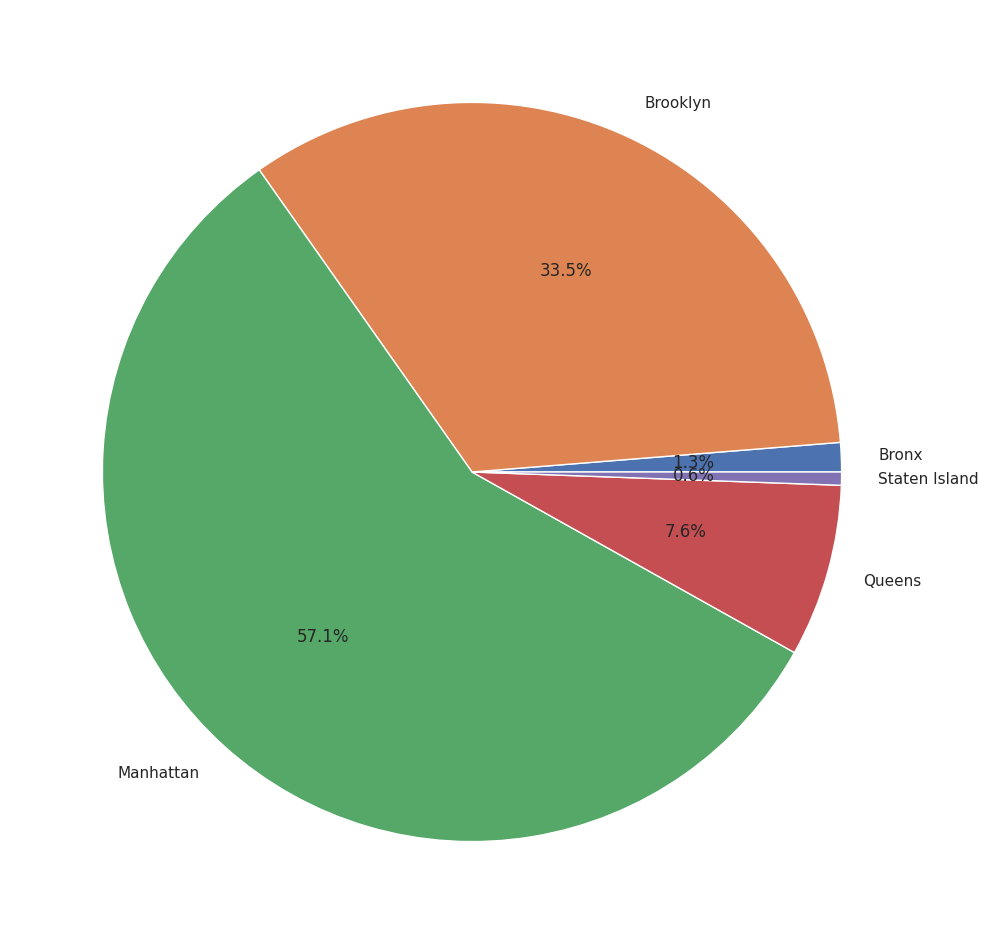

In [25]:
df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(12,12))

Text(0.5, 1.0, 'Mahalleye göre fiyat ortalaması')

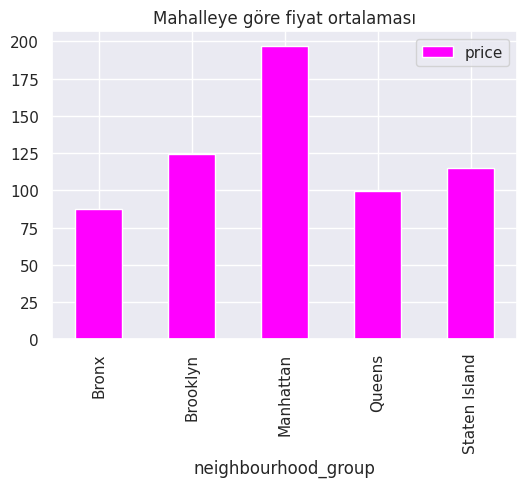

In [30]:
df.groupby('neighbourhood_group').agg({'price':'mean'}).plot.bar(alpha=1,color='magenta').set_title("Mahalleye göre fiyat ortalaması")

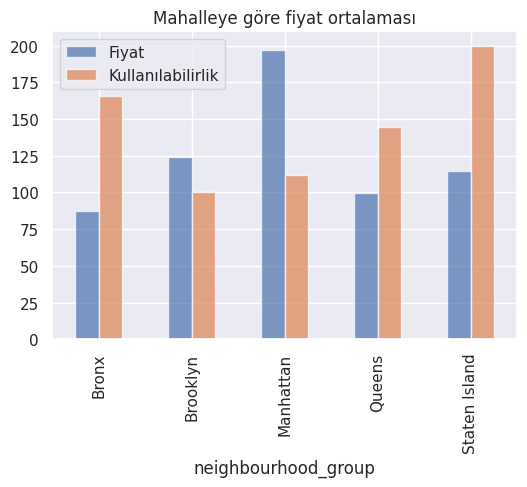

In [31]:
df.groupby('neighbourhood_group').agg({'price':'mean','availability_365':'mean'}).plot.bar(alpha=0.7).set_title("Mahalleye göre fiyat ortalaması")
plt.legend(['Fiyat','Kullanılabilirlik'])

In [32]:
df_1 = df.groupby(by=['neighbourhood_group', 'room_type']).agg({'price':'mean'})
df_1.reset_index(inplace=True)
print(df_1)

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  127.506596
1                Bronx     Private room   66.788344
2                Bronx      Shared room   59.800000
3             Brooklyn  Entire home/apt  178.327545
4             Brooklyn     Private room   76.500099
5             Brooklyn      Shared room   50.527845
6            Manhattan  Entire home/apt  249.239109
7            Manhattan     Private room  116.776622
8            Manhattan      Shared room   88.977083
9               Queens  Entire home/apt  147.050573
10              Queens     Private room   71.762456
11              Queens      Shared room   69.020202
12       Staten Island  Entire home/apt  173.846591
13       Staten Island     Private room   62.292553
14       Staten Island      Shared room   57.444444


Text(0.5, 1.0, 'Mahalle - Fiyat - Oda tipi')

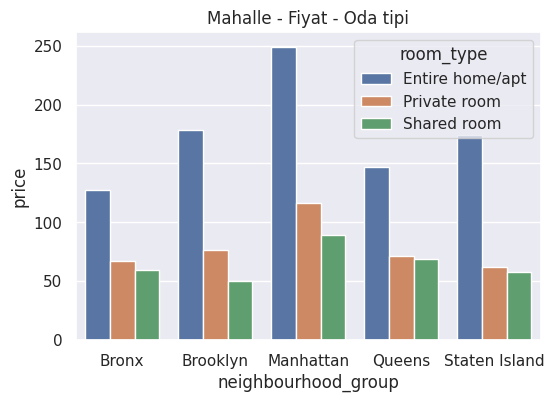

In [33]:
sns.barplot(x=df_1['neighbourhood_group'],y=df_1['price'],hue=df_1['room_type'])
plt.title("Mahalle - Fiyat - Oda tipi")

Text(0.5, 1.0, 'Mahalle - Fiyat')

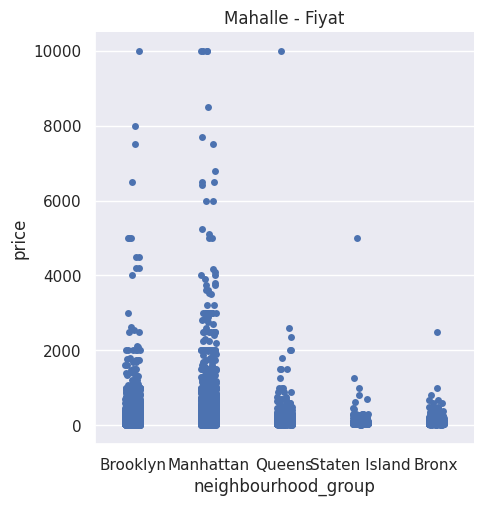

In [34]:
sns.catplot(x="neighbourhood_group", y="price", data=df)
plt.title("Mahalle - Fiyat")

Text(0.5, 1.0, 'Mahalle ve oda tipine göre fiyat ortalaması')

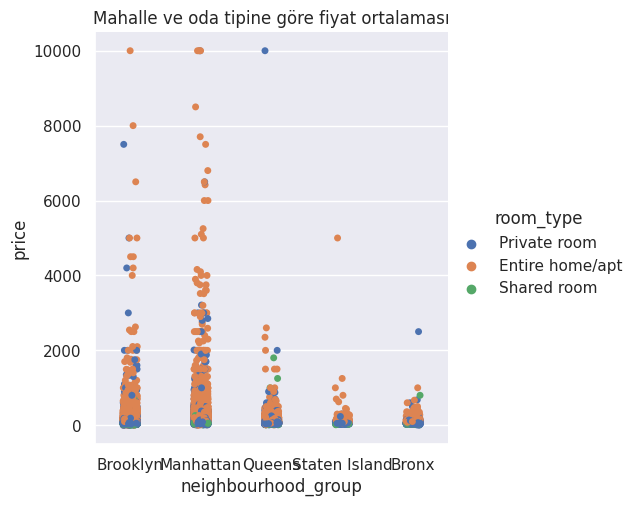

In [35]:
sns.catplot(data=df, x="neighbourhood_group", y="price", kind= 'strip' ,hue="room_type")
plt.title("Mahalle ve oda tipine göre fiyat ortalaması")

Text(0.5, 1.0, 'Mahalle ve oda tipine göre fiyat ortalaması')

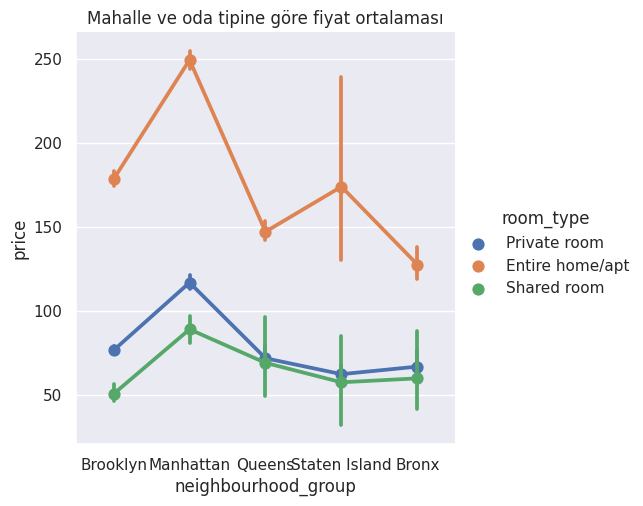

In [36]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="point",data=df)
plt.title("Mahalle ve oda tipine göre fiyat ortalaması")

In [37]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


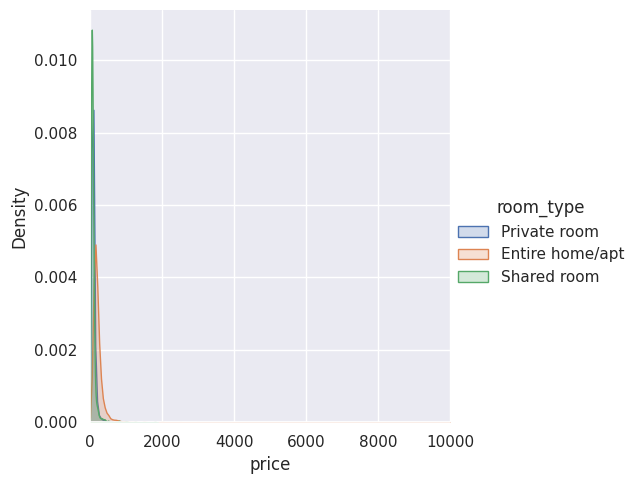

In [38]:
sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, df['price'].max())).map(sns.kdeplot, "price", shade=True).add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

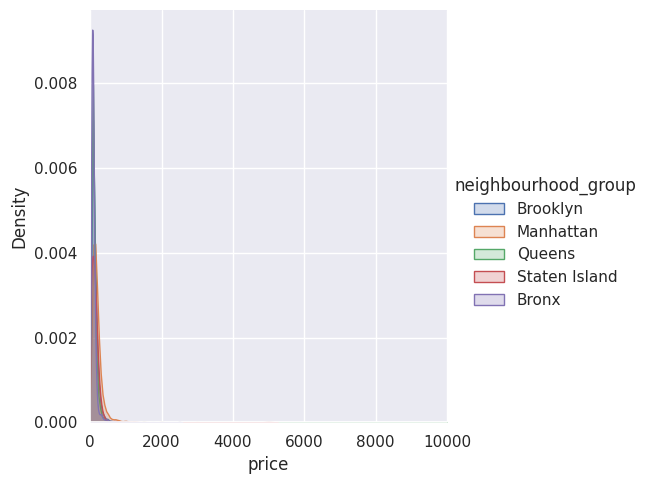

In [39]:
sns.FacetGrid(df, hue="neighbourhood_group", height=5, xlim=(0, 10000)).map(sns.kdeplot, "price", shade=True).add_legend()

<ipython-input-41-c078bb934990>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


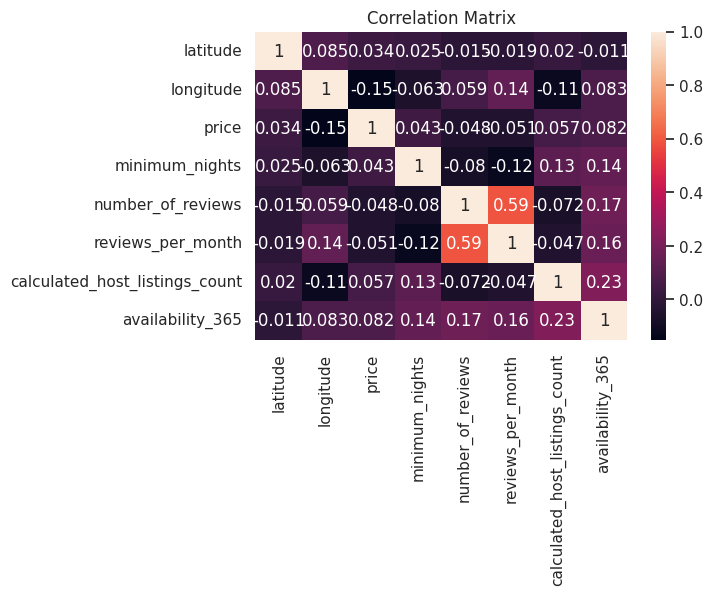

In [41]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True);